In [4]:
%matplotlib inline
import psycopg2
from pyiem.network import Table as NetworkTable
import numpy as np

import matplotlib.cm as cm
COOP = psycopg2.connect(database='coop', host='iemdb', user='nobody')
cursor = COOP.cursor()

cursor.execute("""
  WITH data as 
  (SELECT station, avg(min), max(year) from
  (select station, year, min(extract(doy from day)) from alldata where high >= 50 
  GROUP by station, year) as foo
  GROUP by station)
  
  SELECT data.station, data.avg, ST_x(geom), ST_Y(geom), data.max from stations, data
  WHERE data.station = stations.id
""")
vals = []
lats = []
lons = []
hlons = []
hlats = []
h = []
for row in cursor:
    if row[0][2] == 'C' or row[0][2:] == '0000':
        continue
    lats.append( row[3] )
    lons.append( row[2] )
    vals.append( row[1] )
    if row[4] == 2016:
        hlons.append( row[2] )
        hlats.append( row[3] )
        h.append('x')


In [5]:
import datetime

labels = []
ticks = []
tickrange = range(1,102,10)
for i in tickrange:
    ticks.append(i)
    ts = datetime.datetime(2000,1,1) + datetime.timedelta(days=(i-1))
    labels.append( ts.strftime("%-d %b") )

['1 Jan', '11 Jan', '21 Jan', '31 Jan', '10 Feb', '20 Feb', '1 Mar', '11 Mar', '21 Mar', '31 Mar', '10 Apr']


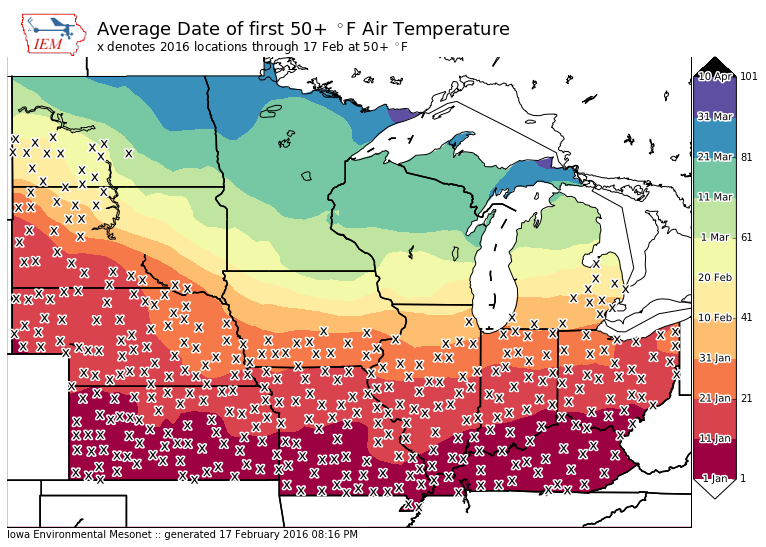

In [11]:
print labels
from pyiem.plot import MapPlot
m = MapPlot(sector='midwest',
            title='Average Date of first 50+ $^\circ$F Air Temperature',
            subtitle='x denotes 2016 locations through 17 Feb at 50+ $^\circ$F')
cmap = cm.get_cmap('Spectral')
cmap.set_under('#ffffff')
cmap.set_over('#000000')
m.contourf(lons, lats, vals, tickrange, clevlabels=labels, cmap=cmap)
m.plot_values(hlons, hlats, h, '%s', labelbuffer=3)
#m.drawcounties()

m.postprocess(filename='160218.png')

